In [4]:
pip install fredapi 

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import time

plt.style.use('fivethirtyeight')
pd.set_option('max_columns',500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred

fred_key = 'my_key'

1. Create The Fred Object

In [7]:
fred = Fred(api_key=fred_key)

2. Search for Economic Data

In [8]:
sp_search = fred.search('S&P', order_by='popularity')

In [9]:
sp_search

id realtime_start realtime_end  \
series id                                                        
BAMLH0A0HYM2          BAMLH0A0HYM2     2023-12-28   2023-12-28   
CSUSHPINSA              CSUSHPINSA     2023-12-28   2023-12-28   
SP500                        SP500     2023-12-28   2023-12-28   
BAMLH0A0HYM2EY      BAMLH0A0HYM2EY     2023-12-28   2023-12-28   
MEHOINUSA672N        MEHOINUSA672N     2023-12-28   2023-12-28   
...                            ...            ...          ...   
CSHMCPROA156NRUG  CSHMCPROA156NRUG     2023-12-28   2023-12-28   
CSHRCPQAA156NRUG  CSHRCPQAA156NRUG     2023-12-28   2023-12-28   
CSHRCPSEA156NRUG  CSHRCPSEA156NRUG     2023-12-28   2023-12-28   
DDEM01ECA156NWDB  DDEM01ECA156NWDB     2023-12-28   2023-12-28   
DDEM01TTA156NWDB  DDEM01TTA156NWDB     2023-12-28   2023-12-28   

                                                              title  \
series id                                                             
BAMLH0A0HYM2      ICE BofA US High Yield Index Option-Adjusted S...   
CSUSHPINSA          S&P/Case-Shiller U.S. National Home Price Index   
SP500                                                       S&P 500   
BAMLH0A0HYM2EY         ICE BofA US High Yield Index Effective Yield   
MEHOINUSA672N     Real Median Household Income in the United States   
...                                                             ...   
CSHMCPROA156NRUG  Share of Merchandise Imports at Current Purcha...   
CSHRCPQAA156NRUG  Share of Residual Trade and GDP Statistical Di...   
CSHRCPSEA156NRUG  Share of Residual Trade and GDP Statistical Di...   
DDEM01ECA156NWDB  Stock Market Turnover Ratio (Value Traded/Capi...   
DDEM01TTA156NWDB  Stock Market Turnover Ratio (Value Traded/Capi...   

                 observation_start observation_end     frequency  \
series id                                                          
BAMLH0A0HYM2            1996-12-31      2023-12-26  Daily, Close   
CSUSHPINSA              1987-01-01      2023-10-01       Monthly   
SP500                   2013-12-30      2023-12-27  Daily, Close   
BAMLH0A0HYM2EY          1996-12-31      2023-12-26  Daily, Close   
MEHOINUSA672N           1984-01-01      2022-01-01        Annual   
...                            ...             ...           ...   
CSHMCPROA156NRUG        1960-01-01      2019-01-01        Annual   
CSHRCPQAA156NRUG        1970-01-01      2019-01-01        Annual   
CSHRCPSEA156NRUG        1950-01-01      2019-01-01        Annual   
DDEM01ECA156NWDB        1995-01-01      2000-01-01        Annual   
DDEM01TTA156NWDB        2000-01-01      2001-01-01        Annual   

                 frequency_short                           units  \
series id                                                          
BAMLH0A0HYM2                   D                         Percent   
CSUSHPINSA                     M              Index Jan 2000=100   
SP500                          D                           Index   
BAMLH0A0HYM2EY                 D                         Percent   
MEHOINUSA672N                  A  2022 CPI-U-RS Adjusted Dollars   
...                          ...                             ...   
CSHMCPROA156NRUG               A                         Percent   
CSHRCPQAA156NRUG               A                         Percent   
CSHRCPSEA156NRUG               A                         Percent   
DDEM01ECA156NWDB               A                         Percent   
DDEM01TTA156NWDB               A                         Percent   

                               units_short      seasonal_adjustment  \
series id                                                             
BAMLH0A0HYM2                             %  Not Seasonally Adjusted   
CSUSHPINSA              Index Jan 2000=100  Not Seasonally Adjusted   
SP500                                Index  Not Seasonally Adjusted   
BAMLH0A0HYM2EY                           %  Not Seasonally Adjusted   
MEHOINUSA672N     2022 CPI-U-RS Adjusted $  Not Seaso

3. Pull Raw Data

In [10]:
sp500 = fred.get_series(series_id='SP500')

<AxesSubplot:title={'center':'S&P 500'}>

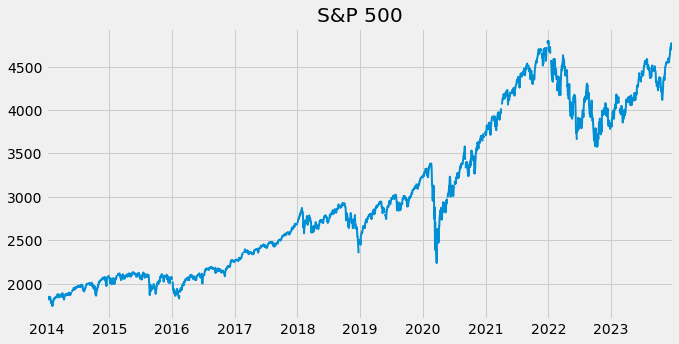

In [11]:
sp500.plot(figsize=(10,5),title='S&P 500', lw=2)

4. Pull and Join Multiple Data Series

In [12]:
unemp_df = fred.search('unemployment rate state',filter=('frequency','Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [13]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1)
uemp_results = pd.concat(all_results, axis=1)

In [14]:
cols_to_drop = []
for i in uemp_results:
    if len(i) > 4:
        cols_to_drop.append(i)
uemp_results = uemp_results.drop(columns = cols_to_drop, axis=1)

In [15]:
uemp_states = uemp_results.copy()  #.drop('UNRATE', axis=1)
uemp_states = uemp_states.dropna()
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ','').to_dict()
uemp_states.columns = [id_to_state[c] for c in uemp_states.columns]

In [16]:
# Plot States Unemployment Rate
px.line(uemp_states)

Pull May 2020 Unemployment Rate Per State

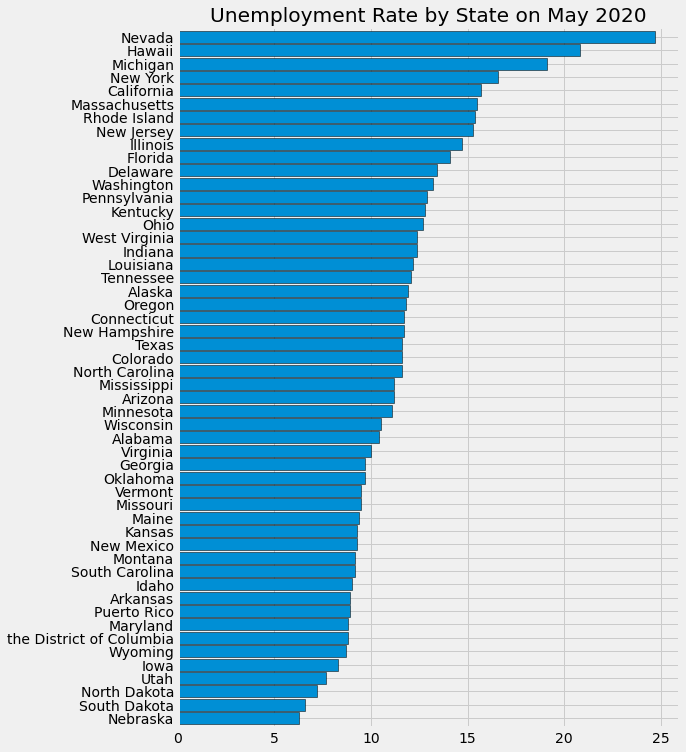

In [17]:
ax = uemp_states.loc[uemp_states.index == '2020-05-01'].T \
    .sort_values('2020-05-01') \
    .plot(kind='barh',figsize=(8,12), width=0.9, edgecolor='black',
          title='Unemployment Rate by State on May 2020')
ax.legend().remove()
plt.show()

Pull Participation Rate

In [18]:
part_df = fred.search('participation rate state',filter=('frequency','Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [19]:
part_df.shape

(109, 15)

In [20]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()

all_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1) # Don't request to fast and get blocked
part_states = pd.concat(all_results, axis=1)
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

Plot Unemployment vs Participation

In [21]:
# Fixing District of Columbia
uemp_states = uemp_states.rename(columns={'the District of Columbia':'District Of Columbia'})

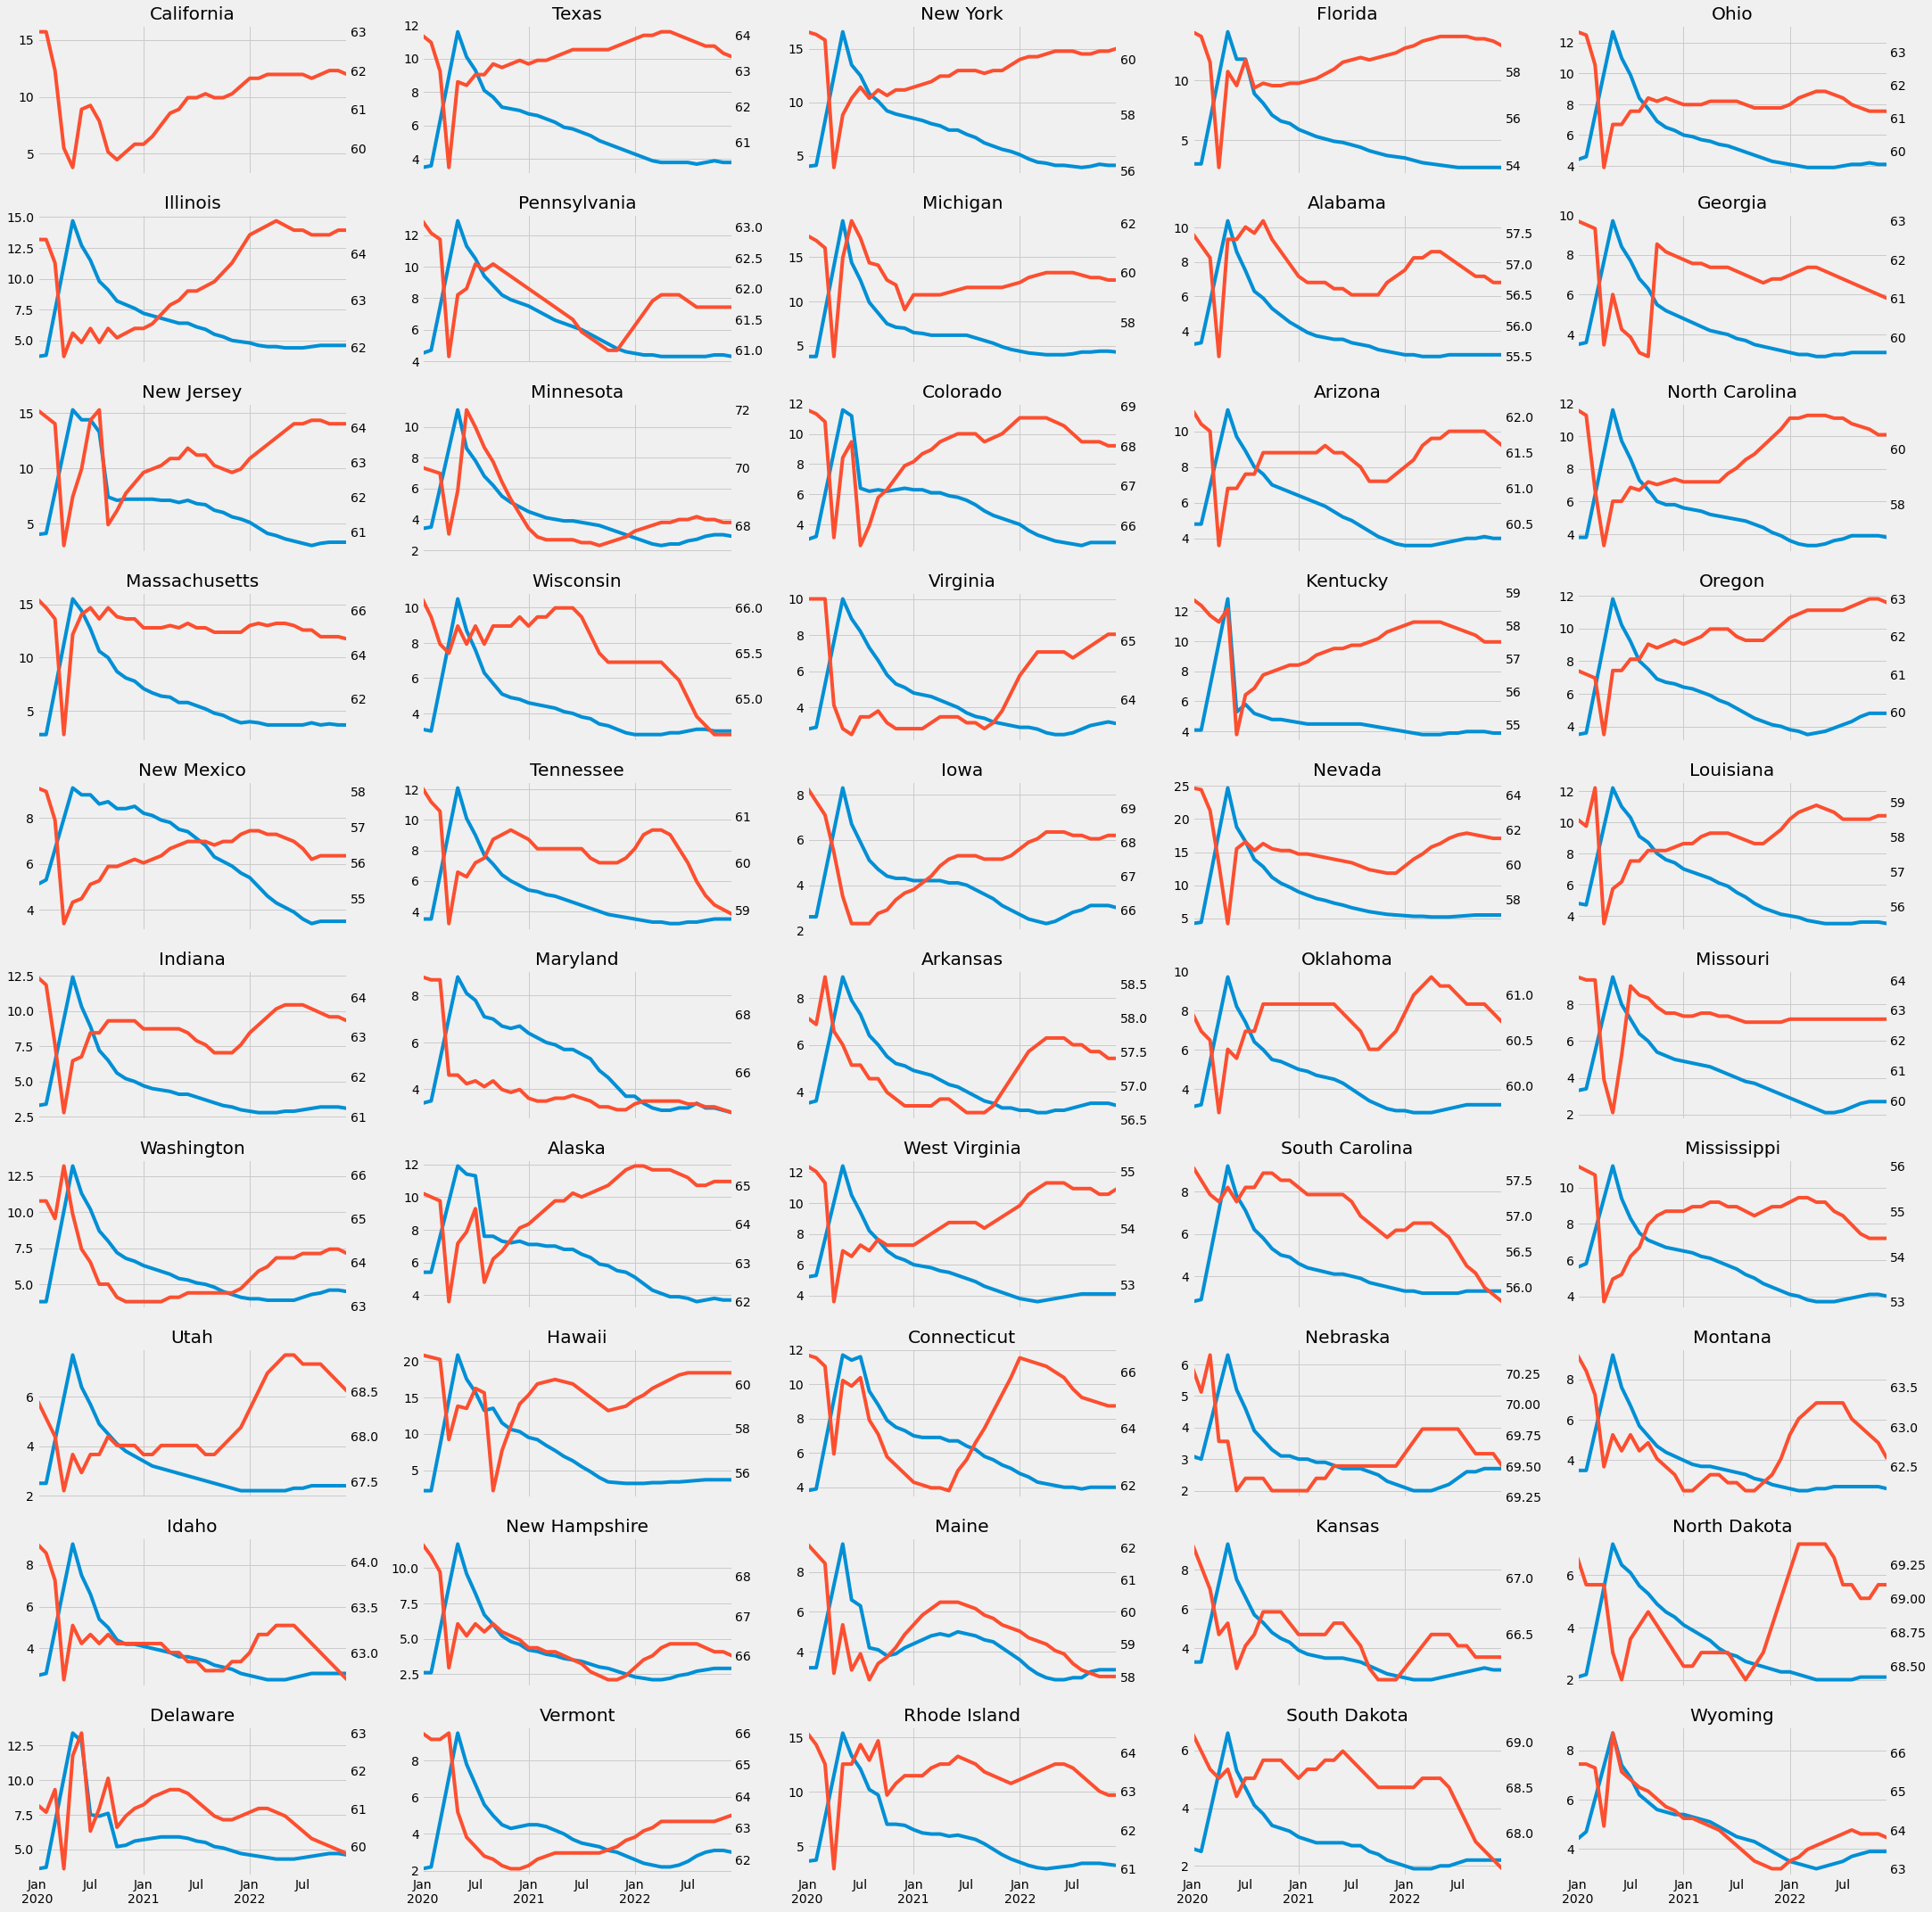

In [22]:
fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten()

i = 0
for state in uemp_states.columns:
    if state in ["District Of Columbia","Puerto Rico"]: #only 50 spots
        continue
    ax2 = axs[i].twinx()
    uemp_states.query('index >= 2020 and index < 2023')[state] \
        .plot(ax=axs[i], label='Unemployment')
    part_states.query('index >= 2020 and index < 2023')[state] \
        .plot(ax=ax2, label='Participation', color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()